In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.layers import Dropout

from PIL import Image

import matplotlib.pyplot as plt

In [ ]:
# when using colab
!unzip TEST.zip
!unzip TRAIN.zip

Streaming output truncated to the last 5000 lines.
  inflating: TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8931.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_8989.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_899.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9320.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9338.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9682.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_969.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9729.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9799.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9866.jpeg  
  inflating: TRAIN/LYMPHOCYTE/_9_9954.jpeg  
   crea

In [ ]:
# Define dataset folders
test_folder = 'TEST'
train_folder = 'TRAIN'
labels_file = 'labels.csv'

# Load labels from CSV
labels_df = pd.read_csv(labels_file)

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(200, 200),
    batch_size=48,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(200, 200),
    batch_size=48,
    class_mode='categorical',
    subset='validation'
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


In [ ]:
# Load pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze convolutional layers
for layer in vgg16.layers:
    layer.trainable = False

# Build model on top of VGG16
model = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/20
166/166 [==============================] - 163s 974ms/step - loss: 1.6117 - accuracy: 0.3668 - val_loss: 1.1896 - val_accuracy: 0.5091
Epoch 2/20
166/166 [==============================] - 162s 973ms/step - loss: 1.2124 - accuracy: 0.4561 - val_loss: 1.0734 - val_accuracy: 0.5539
Epoch 3/20
166/166 [==============================] - 162s 975ms/step - loss: 1.1093 - accuracy: 0.5103 - val_loss: 1.0487 - val_accuracy: 0.5722
Epoch 4/20
166/166 [==============================] - 162s 975ms/step - loss: 1.0600 - accuracy: 0.5267 - val_loss: 0.9609 - val_accuracy: 0.6286
Epoch 5/20
166/166 [==============================] - 163s 980ms/step - loss: 1.0375 - accuracy: 0.5453 - val_loss: 0.9629 - val_accuracy: 0.6184
Epoch 6/20
166/166 [==============================] - 161s 971ms/step - loss: 1.0561 - accuracy: 0.5207 - val_loss: 0.9362 - val_accuracy: 0.6651
Epoch 7/20
166/166 [==============================] - 161s 970ms/step - loss: 1.0279 - accuracy: 0.5237 - val_loss: 0.8697 -

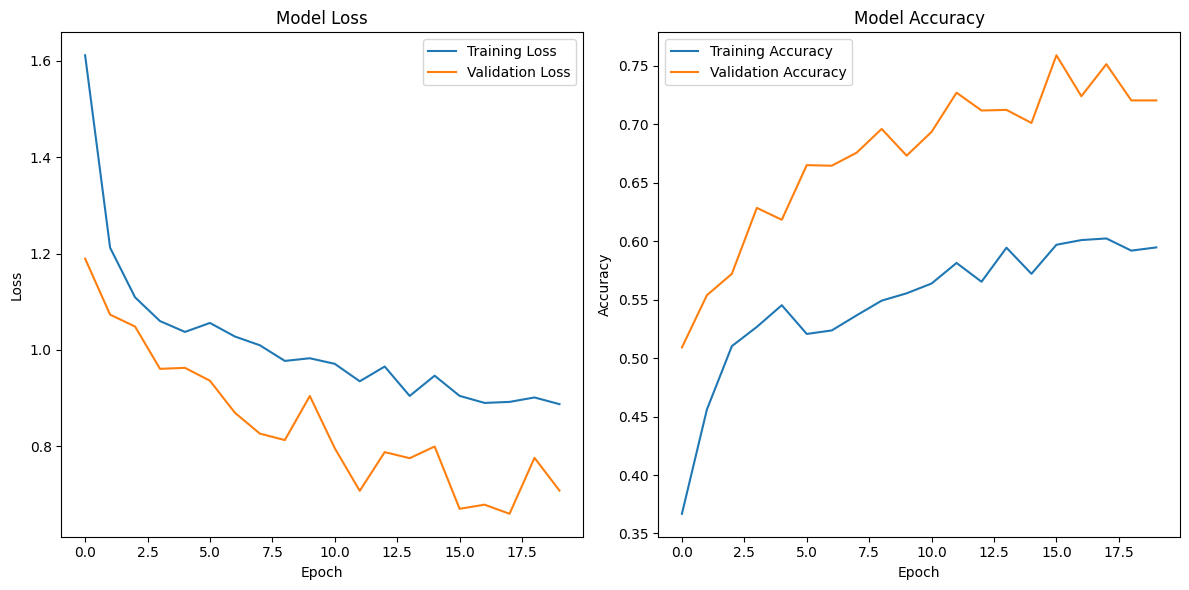

In [ ]:

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()